In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from scipy.stats import shapiro
import statsmodels.api as sm

In [24]:
X, y = make_regression(n_samples=200, n_features=1, noise=12,bias=3, random_state=42)

In [25]:
X = X.ravel()
y = y.ravel()

In [26]:
df = pd.DataFrame(X,y).reset_index()
df.columns = ["X","y"]

In [27]:
df.corr()

,X,y
X,1.000000,0.989048
y,0.989048,1.000000


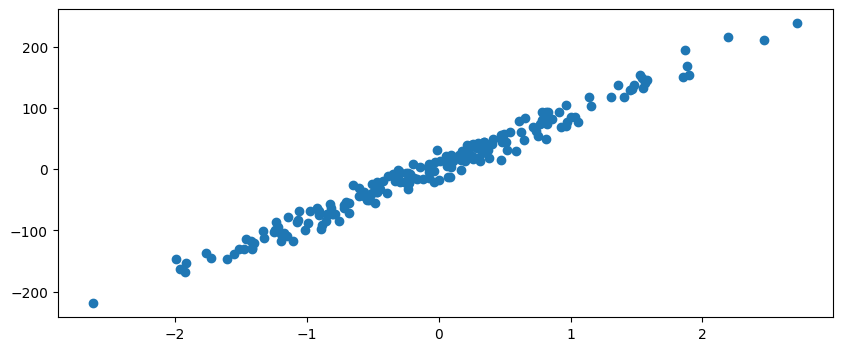

In [28]:
plt.figure(figsize=(10,4))
plt.scatter(X, y)
plt.show()

In [83]:
class SimpleLinearRegression:
    """Ordinary least squares Simple Linear Regression
    Creating a simple linear regression
        1. This model can take one X variable and one y Response variable
        2. the equation forms is y_hat = mx + c
        3. The values m, c are found by minimizing loss function
        4. the loss function is = sum(y-y_hat)^2
    """
    def __init__(self):
        self._slope = None
        self._intercept = None
        
    def fit(self,X,y):
        self.x_bar = np.mean(X)
        self.y_bar = np.mean(y)
        self._slope = np.sum((X-self.x_bar)*(y-self.y_bar))/np.sum((X-self.x_bar)**2)
        self._intercept = self.y_bar - self._slope*self.x_bar
        
    def predict(self,X):
        y_hat = self._slope*X + self._intercept
        
        return y_hat      
    
    def sumOfSquares(self,y,y_hat):
        self.SSE = np.sum((y-y_hat)**2)
        self.SST = np.sum((y-self.y_bar)**2)
        self.SSR = np.sum((y_hat-self.y_bar)**2)
        
        print("Total Sum of Squares (y-y_bar)^2  SST:",round(self.SST,2))
        print("Errors Sum of Squares (y-y_hat)^2 SSE:",round(self.SSE,2))
        print("Regression Sum of Squares (y_hat-y_bar)^2 SSR:",round(self.SSR,2))
        
    def metrics(self,X,y,y_hat):
        n = len(y)
        k = len(X.shape)
        SSm = np.sum((X-np.mean(X))**2)
        SSb = 1/n + np.mean(X)**2/SSm
        
        MAE = np.mean(np.abs(y-y_hat))
        MAPE = np.mean(np.abs((y - y_hat) / y) * 100)
        
        # coefficient of Determination r-squared
        r_squared = self.SSR/self.SST       
        # Adjusted r-squared
        adj_r_squared = (1-r_squared)*(n-1)/(n-k-1)
        #mean Square Error
        MSE = self.SSE/(n-k-1)
        #Standard  Error
        s = np.sqrt(self.SSE/(n-k-1))
        sm = s/np.sqrt(SSm)
        sb = s*np.sqrt(SSb)
        
        print("Mean Absolute Error MAE :", round(MAE,3))
        print("Mean Absolute percnt Error MAPE :", round(MAPE,3))
        print("R-Squared 1-SSE/SST :", round(r_squared,3))
        print("Adjusted R-Squared (1-r2)(n-1)/(n-k-1) :", round(adj_r_squared,3))
        print("-"*80)
        print("Mean Square Error MSE = SSE/(n-k-1) :", round(MSE,3))
        print("Standard Error s|Syx = sqrt(SSE/(n-k-1)) :", round(s,3))
        print("Standard Error of slope,m sm = Syx/sqrt(SSm)) :", round(sm,3))
        print("Standard Error of intrcpt,b sb = Syx*sqrt(SSb)) :", round(sb,3))
        
    def normalityTest(self, y, y_hat):
        # Shapiro-Wilk test
        shapiro_stat, shapiro_p = shapiro(y-y_hat)
        print("Shapiro-Wilk Test:")
        print(f"Test Statistic: {round(shapiro_stat,4)}")
        print(f"P-value: {round(shapiro_p,4)}")
        print("-"*80)
        if shapiro_p > 0.05:
            print("Shapiro-Wilk test indicates a NORMAL distribution (p > 0.05)")
        else:
            print("Shapiro-Wilk test indicates a NON-NORMAL distribution (p <= 0.05)")
            
        print()
        print("Mean of Residual :", round(np.mean(y-y_hat),4))
            
        font = {
        'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 18
        }

        fig, axs = plt.subplots(1,2,figsize=(13,4),layout='constrained')

        sns.scatterplot(x=y_hat, y=(y-y_hat), ax= axs[0], s=100, facecolor='green', edgecolor='darkred')
        axs[0].axhline(y=0, linewidth=2,linestyle = "--", color='brown')
        axs[0].set_title("Homoscedasticity", fontsize=20,color='darkblue', fontweight="bold")
        axs[0].set_xlabel("Fitted Values", fontdict = font)
        axs[0].set_ylabel("Residual Values", fontdict = font)
        axs[0].tick_params(labelcolor="blue", labelsize=12, width=4)


        sns.histplot(x=(y-y_hat), kde=True,ax= axs[1], color="lightgreen", edgecolor="black")
        axs[1].set_title("Residual Distribution Plot", fontsize=20,color='darkblue', fontweight="bold")
        axs[1].set_xlabel("Residual Values", fontdict = font)
        axs[1].set_ylabel("Count Values", fontdict = font)
        # Customize the KDE line
        kde_line = axs[1].lines[0]
        kde_line.set_color("darkred")
        kde_line.set_linewidth(4)

        plt.show()
        
    def independenceOfResiduals(self,X,y,y_hat):
        
        # Fit a linear regression model
        X = sm.add_constant(X)  # Add a constant term for the intercept
        model = sm.OLS(y, X).fit()

        # Perform the Durbin-Watson test
        durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.resid)
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')

        # Print the Durbin-Watson statistic and interpret the result
        print("Durbin-Watson Statistic:", durbin_watson_statistic)
        if durbin_watson_statistic < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied')
        elif durbin_watson_statistic > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')
            
        font = {
        'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 18
    }

        fig, axs = plt.subplots(figsize=(12,4),layout='constrained')

        temp_df = pd.DataFrame(y,y_hat).reset_index()
        temp_df.columns = ["y","y_hat"]
        temp_df = temp_df.sort_values(by="y").reset_index(drop=True)
        temp_df

        sns.scatterplot(x=temp_df["y_hat"], y=temp_df["y"]-temp_df["y_hat"], ax= axs, s=100, facecolor='green', edgecolor='darkred')
        axs.axhline(y=0, linewidth=2,linestyle = "--", color='brown')
        axs.set_title("Independance of Residuals", fontsize=20,color='darkblue', fontweight="bold")
        axs.set_xlabel("Sorted Fitted Values", fontdict = font)
        axs.set_ylabel("Residual Values", fontdict = font)
        axs.tick_params(labelcolor="blue", labelsize=12, width=4)
        plt.show()
        
    def linearRelationship(self,y,y_hat):
        font = {
                'family': 'serif',
                'color':  'darkred',
                'weight': 'bold',
                'size': 18
            }
        # Define the slope (m) and intercept (c)
        m_line = np.tan(np.deg2rad(45))  # Convert 45 degrees to radians
        c_line = self._intercept

        # Generate x values
        x_line = np.linspace(-200, 500, 1000)  # Adjust the range and number of points as needed

        # Calculate corresponding y values using the equation y = mx + c
        y_line = m_line * x_line  + c_line

        fig, axs = plt.subplots(figsize=(12,4),layout='constrained')

        sns.scatterplot(x=y_hat, y=y, ax= axs, s=100, facecolor='green', edgecolor='darkred')
        # Add the 45-degree line
        plt.plot(x_line, y_line, linestyle='--', color='red', label='45-Degree Line')
        axs.set_title("Linear Relationship", fontsize=20,color='darkblue', fontweight="bold")
        axs.set_xlabel("Predicted Values", fontdict = font)
        axs.set_ylabel("Original Values", fontdict = font)
        axs.tick_params(labelcolor="blue", labelsize=12, width=4)
        plt.grid()
        plt.legend()
        plt.show()
        

## 1.Simple Linear Regression

In [84]:
slr = SimpleLinearRegression()
lr = LinearRegression()
print(slr.__doc__)

Ordinary least squares Simple Linear Regression
    Creating a simple linear regression
        1. This model can take one X variable and one y Response variable
        2. the equation forms is y_hat = mx + c
        3. The values m, c are found by minimizing loss function
        4. the loss function is = sum(y-y_hat)^2
    


In [85]:
lr.fit(np.array(X).reshape(-1,1),y)
print("Intercept",lr.intercept_)
print("Slope",lr.coef_)

Intercept 4.7142166812254285
Slope [87.2922424]


In [86]:
slr.fit(X,y)
y_hat = slr.predict(X)
print("Intercept",slr._intercept)
print("Slope",slr._slope)

Intercept 4.71421668122543
Slope 87.29224240016919


## 2.Measures of Variation

In [87]:
slr.sumOfSquares(y,y_hat)

Total Sum of Squares (y-y_bar)^2  SST: 1343608.77
Errors Sum of Squares (y-y_hat)^2 SSE: 29269.78
Regression Sum of Squares (y_hat-y_bar)^2 SSR: 1314338.99


In [88]:
slr.SSR +slr.SSE

1343608.7688437984

#### Coefficient of Determination & Standard Error Estimate

In [89]:
slr.metrics(X,y,y_hat)

Mean Absolute Error MAE : 9.741
Mean Absolute percnt Error MAPE : 48.517
R-Squared 1-SSE/SST : 0.978
Adjusted R-Squared (1-r2)(n-1)/(n-k-1) : 0.022
--------------------------------------------------------------------------------
Mean Square Error MSE = SSE/(n-k-1) : 147.827
Standard Error s|Syx = sqrt(SSE/(n-k-1)) : 12.158
Standard Error of slope,m sm = Syx/sqrt(SSm)) : 0.926
Standard Error of intrcpt,b sb = Syx*sqrt(SSb)) : 0.861


In [90]:
print(mean_absolute_error(y,y_hat))
print(mean_absolute_percentage_error(y,y_hat))
print(r2_score(y,y_hat))
print(mean_squared_error(y,y_hat))

9.740950811189226
0.4851650019235153
0.9782155484699849
146.34890050090436


In [91]:
slr.SSE/(len(y))

146.34890050090436

## 3. Assumptions of Linear Regression

Residual Analysis
* Linearity
* Normality of error, residual mean, Equal variance
* Independence of errors
* 

Autocorrelation
* Durbin watson test

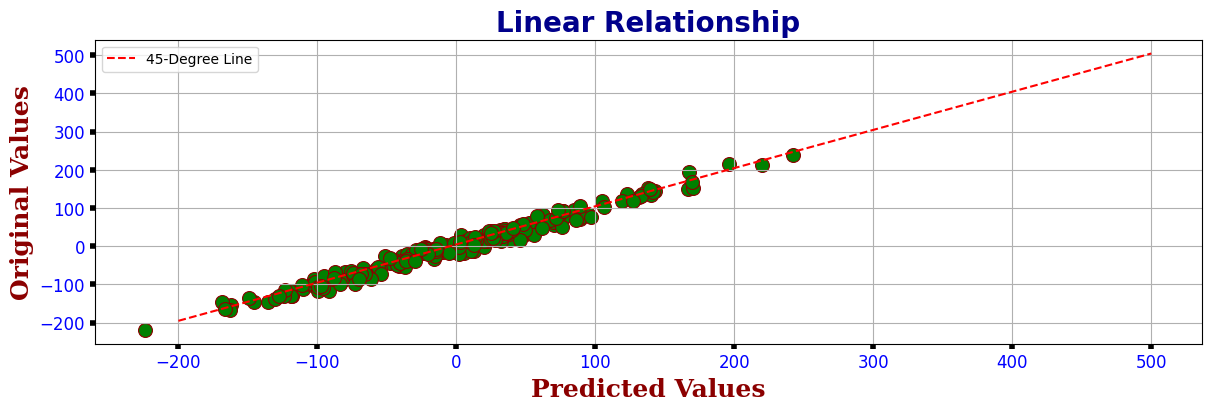

In [92]:
# 1. Linear Relationship
slr.linearRelationship(y,y_hat)

Shapiro-Wilk Test:
Test Statistic: 0.9907
P-value: 0.2286
--------------------------------------------------------------------------------
Shapiro-Wilk test indicates a NORMAL distribution (p > 0.05)

Mean of Residual : -0.0


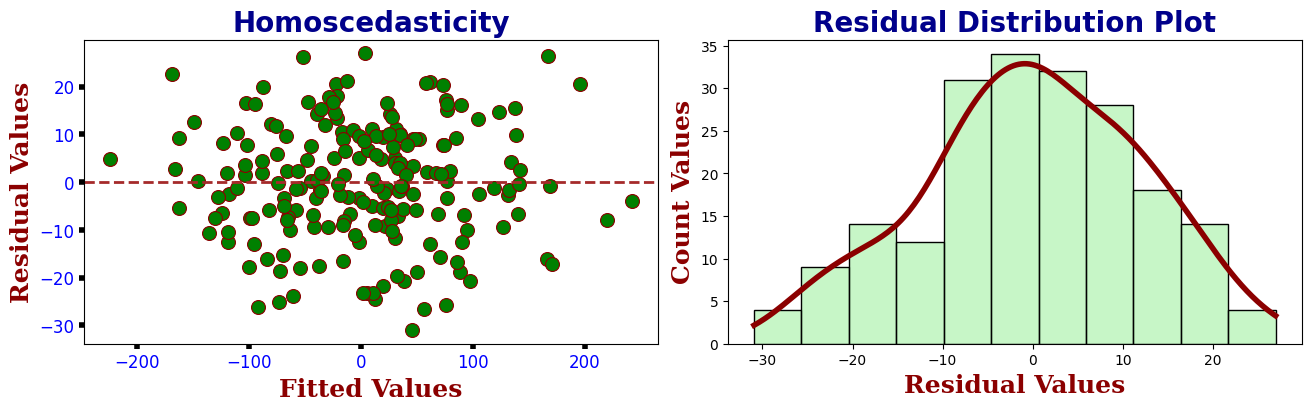

In [93]:
# 2. Normality of errors and mean of errors
slr.normalityTest(y,y_hat)

Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson Statistic: 1.9766994466845673
Little to no autocorrelation 

Assumption satisfied


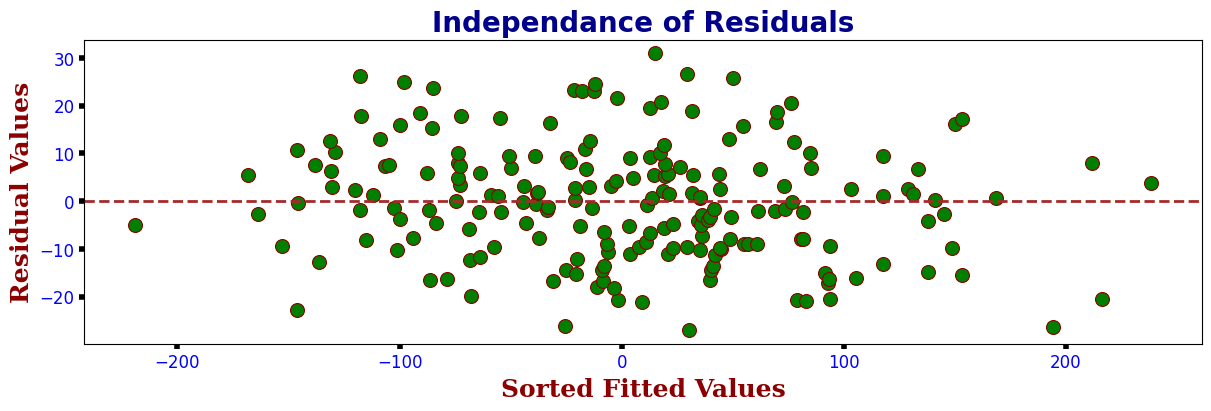

In [94]:
# 3 Independance of Residuals as per order of response variable
slr.independenceOfResiduals(X,y,y_hat)